In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import ticker
import pathlib

# Read training data from HDF5 file
Testing data is randomly sampled from training, no need to repeat the anaylisis with weaker statistics.

In [2]:
inputTrain = './data/trainData.h5'
df_train = pd.read_hdf(inputTrain, 'LHCb_Train')
df_train

,p_PT,p_PZ,DTF_FixJPsi_p_PT,DTF_FixJPsi_p_PZ,DTF_FixJPsiLambda_p_PT,DTF_FixJPsiLambda_p_PZ,pim_PT,pim_PZ,DTF_FixJPsi_pim_PT,DTF_FixJPsi_pim_PZ,...,L_VFASPF_CHI2_VDOF,Lb_VFASPF_CHI2_VDOF,L_BPVIPCHI2,Lb_BPVIPCHI2,L_BPVVDCHI2,Lb_BPVVDCHI2,DTF_FixJPsi_status,DTF_FixJPsiLambda_status,TYPE,DTF_FixJPsiLambda_Lb_M
0,1499.261230,64090.687500,1449.125122,71109.312500,1339.061157,67585.578125,142.576462,16002.674805,222.223770,15295.935547,...,12.397956,1.006837,3.118125,4.247471,8.394142e+03,839.898499,0.0,0.0,1,5649.782715
1,6531.696777,43770.664062,7950.545410,53713.472656,7250.666016,48946.476562,1098.382568,7154.821289,1173.632935,7339.285645,...,72.018669,4.932845,9.285525,0.700478,3.165763e+05,28.328979,0.0,0.0,1,5346.287598
2,1195.592285,25513.001953,2846.242432,45061.835938,2590.605225,40850.550781,600.855042,6536.190430,531.966919,6502.588379,...,58.929020,38.498478,109.721619,0.822907,4.876989e+04,969.064880,0.0,0.0,1,5625.960449
3,8357.870117,48524.460938,13019.551758,77204.125000,10886.081055,65169.863281,954.039429,8363.340820,1251.309082,8721.902344,...,4.634126,2.500692,5.822659,0.760508,2.613000e+03,11152.960938,0.0,0.0,1,5480.049316
4,931.300659,24994.496094,1355.522217,32809.832031,1152.498901,30213.080078,812.275085,7415.243652,194.003128,7669.465332,...,2.344827,9.562636,28.231209,3.574740,1.273677e+03,22431.037109,0.0,1.0,1,5446.454102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217943,445.273392,13820.158702,3972.747559,120230.015625,1337.582764,36320.218750,761.756481,3374.140357,546.493347,3185.904053,...,63.446099,1.218580,3.571386,15.079227,6.501153e+04,44.503804,0.0,1.0,0,4911.453613
217944,625.634413,11269.897699,525.380066,10684.035156,392.802063,8542.464844,145.763878,2076.179413,134.418900,2092.732178,...,28.279526,6.260448,18.039083,3.554084,2.436691e+06,13.191321,0.0,0.0,0,4925.180664
217945,1526.666540,98911.628918,1539.424927,90282.515625,1497.569336,86306.203125,606.937059,22006.441937,451.258881,21892.208984,...,0.144299,0.037113,0.103937,22.219251,9.227146e+03,34.697374,0.0,0.0,0,5015.115234
217946,3970.637721,70980.828844,2426.877930,41451.250000,1642.944458,28352.472656,357.615649,6230.024520,298.756683,6482.682129,...,45.532044,10.496439,29.901501,1.806842,1.390948e+05,2.311459,0.0,0.0,0,4909.061035


In [3]:
df_MC = df_train[df_train['TYPE'] == 1]
df_SB = df_train[df_train['TYPE'] == 0]

In [4]:
## Create plots directory, if missing
plotsDirectory = '/home/adegenna/2sb-classifier-studies/plots/feature_analysis/'
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

# Invariant mass distribution

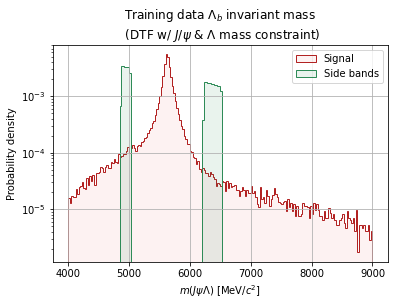

In [5]:
plt.hist(df_MC['DTF_FixJPsiLambda_Lb_M'],
         bins=200,
         range=(4000,9000),
         label='Signal',
         density=True,
         histtype='stepfilled',
         edgecolor='firebrick',
         color=mcolors.to_rgba('lightcoral', alpha=0.1)
)

plt.hist(df_SB['DTF_FixJPsiLambda_Lb_M'],
         bins=200,
         range=(4000,9000),
         label='Side bands',
         density=True,
         histtype='stepfilled',
         edgecolor='seagreen',
         color=mcolors.to_rgba('seagreen', alpha=0.1)
)
plt.grid()
plt.xlabel("$m(J\psi \Lambda)$ [MeV/$c^2$]")
plt.title("Training data $\Lambda_b$ invariant mass\n (DTF w/ $J/\psi$ & $\Lambda$ mass constraint)")
plt.legend()
plt.yscale('log')
plt.ylabel("Probability density")
plt.savefig(plotsDirectory + 'sig_bkg_distribution.pdf', bbox_inches='tight')
plt.show()

# Correlation matrices

In [6]:
features = [
    'p_PT',
    'p_PZ',
    'DTF_FixJPsi_p_PT',
    'DTF_FixJPsi_p_PZ',
    'DTF_FixJPsiLambda_p_PT',
    'DTF_FixJPsiLambda_p_PZ',
    'pim_PT',
    'pim_PZ',
    'DTF_FixJPsi_pim_PT',
    'DTF_FixJPsi_pim_PZ',
    'DTF_FixJPsiLambda_pim_PT',
    'DTF_FixJPsiLambda_pim_PZ',
    'Jpsi_PT',
    'Jpsi_PZ',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'L_BPVDIRA',
    'Lb_BPVDIRA',
    'L_VFASPF_CHI2_VDOF',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVIPCHI2',
    'Lb_BPVIPCHI2',
    'L_BPVVDCHI2',
    'Lb_BPVVDCHI2',
    'DTF_FixJPsi_status',
    'DTF_FixJPsiLambda_status'
]

In [7]:
featureLabels = {
    'p_PT': '$p_T(p)$',
    'DTF_FixJPsi_p_PT': '$p_T^{DTF}(p)$',
    'DTF_FixJPsiLambda_p_PT': '$p_T^{DTF}(p)$ ($\Lambda$ m.c.)',
    'p_PZ': '$p_z(p)$',
    'DTF_FixJPsi_p_PZ': '$p_z^{DTF}(p)$',
    'DTF_FixJPsiLambda_p_PZ': '$p_z^{DTF}(p)$ ($\Lambda$ m.c.)',
    'pim_PT': '$p_T(\pi)$',
    'DTF_FixJPsi_pim_PT': '$p_T^{DTF}(\pi)$',
    'DTF_FixJPsiLambda_pim_PT': '$p_T^{DTF}(\pi)$ ($\Lambda$ m.c.)',
    'pim_PZ': '$p_z(\pi)$',
    'DTF_FixJPsi_pim_PZ': '$p_z^{DTF}(\pi)$',
    'DTF_FixJPsiLambda_pim_PZ': '$p_Z^{DTF}(\pi)$ ($\Lambda$ m.c.)',
    'Jpsi_PT': '$p_T(J/\psi)$',
    'Jpsi_PZ': '$p_z(J/\psi)$',
    'L_ENDVERTEX_X': '$x_{vtx}^\Lambda$',
    'L_ENDVERTEX_Y': '$y_{vtx}^\Lambda$',
    'L_ENDVERTEX_Z': '$z_{vtx}^\Lambda$',
    'L_BPVDIRA': '$\Lambda$ DIRA',
    'Lb_BPVDIRA': '$\Lambda_b$ DIRA',
    'L_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda)$',
    'Lb_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda_b)$',
    'L_BPVIPCHI2': '$\Lambda$ IPCHI2',
    'Lb_BPVIPCHI2': '$\Lambda_b$ IPCHI2',
    'L_BPVVDCHI2': '$\Lambda$ VDCHI2',
    'Lb_BPVVDCHI2': '$\Lambda_b$ VDCHI2',
    'DTF_FixJPsi_status': 'DTF status',
    'DTF_FixJPsiLambda_status': 'DTF status ($\Lambda$ m.c.)'
}

## Signal events

In [8]:
MC_covDF = df_MC[features].corr()

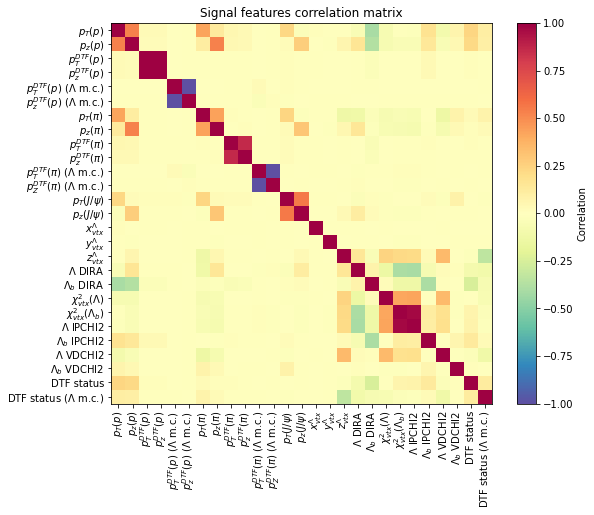

In [9]:
plt.figure(figsize=(9,7))
plt.matshow(MC_covDF, cmap='Spectral_r',fignum=0) ## Fignum=0 plots on current figure (matshow creates a new one by default)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("Signal features correlation matrix")
ax = plt.gca() 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([featureLabels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([featureLabels[feature] for feature in features])
plt.show()

Very high correlation between `Lb_VFASPF_CHI2_VDOF` and `L_BPVIPCHI2`. Significant correlation between daughter particles VF momenta, both between $p_T$ and $p_z$ (reasonable) and amongst themselves (expected for a pure signal sample).

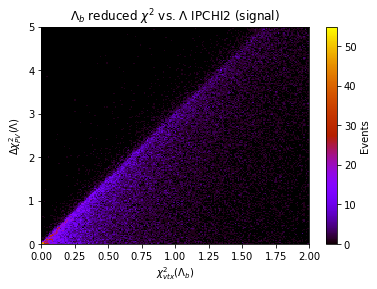

In [10]:
plt.hist2d(df_train.loc[df_train['TYPE'] == 1, 'Lb_VFASPF_CHI2_VDOF'],
           df_train.loc[df_train['TYPE'] == 1, 'L_BPVIPCHI2'],
           bins=200, cmap='gnuplot', range=[[0,2],[0,5]])
plt.title("$\Lambda_b$ reduced $\chi^2$ vs. $\Lambda$ IPCHI2 (signal)")
plt.xlabel("$\chi^2_{vtx}(\Lambda_b)$")
plt.ylabel("$\Delta\chi^2_{PV} (\Lambda)$")
plt.colorbar(label='Events')
plt.show()

Results on DTF variables are not as realiable because there are no cuts applied, therefore some outrageously bad values can (and do) screw with the correlation algorithm. For instance:

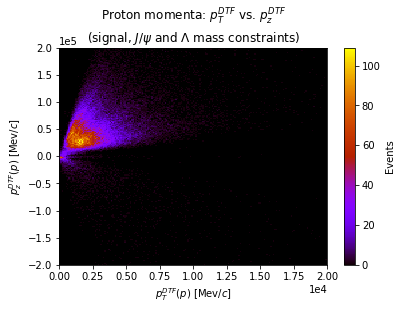

In [11]:
plt.hist2d(df_MC['DTF_FixJPsiLambda_p_PT'], df_MC['DTF_FixJPsiLambda_p_PZ'],
           bins=200, cmap='gnuplot', range=[[0,2e4],[-2e5,2e5]])
plt.title("Proton momenta: $p_T^{DTF}$ vs. $p_z^{DTF}$\n(signal, $J/\psi$ and $\Lambda$ mass constraints)")
plt.xlabel("$p_T^{DTF}(p)$ [Mev/$c$]")
plt.ylabel("$p_z^{DTF}(p)$ [Mev/$c$]")
plt.colorbar(label='Events')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

Events are obviously correlated, but the algorithm is tricked by the small number of events in the lower region and thinks there is a heavy anti-correlation.

## Background events

In [12]:
SB_covDF = df_SB[features].corr()

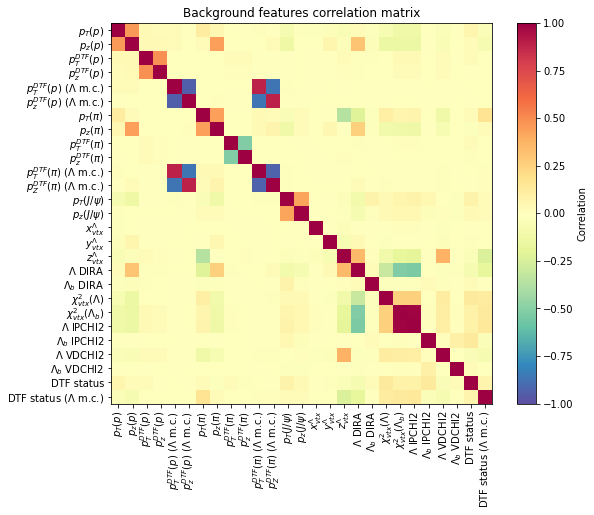

In [13]:
plt.figure(figsize=(9,7))
plt.matshow(SB_covDF, cmap='Spectral_r',fignum=0) ## Fignum=0 plots on current figure (matshow creates a new one by default)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("Background features correlation matrix")
ax = plt.gca() 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([featureLabels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([featureLabels[feature] for feature in features])
plt.show()

Generally less correlation between variables, in particular VF transverse/longitudinal momenta of the same particles. Slight anti-correlation between $\Lambda_b$ $\chi^2$ and $\Lambda$ pointing angle.

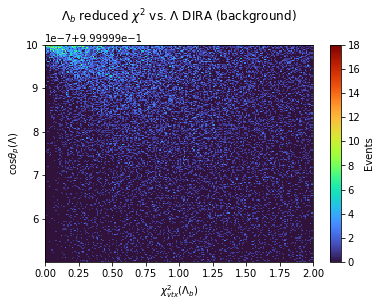

In [14]:
plt.hist2d(df_SB['Lb_VFASPF_CHI2_VDOF'], df_SB['L_BPVDIRA'],
           bins=200, cmap='turbo', range=[[0,2],[0.9999995,1]])
plt.title("$\Lambda_b$ reduced $\chi^2$ vs. $\Lambda$ DIRA (background)\n")
plt.xlabel("$\chi^2_{vtx}(\Lambda_b)$")
plt.ylabel(r"$\cos\theta_p (\Lambda)$")
plt.colorbar(label='Events')
plt.show()